# Basis functions and scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Load data

In [2]:
dat = pd.read_csv("./rbfs/phi_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,854,855,856,857,858,859,860,y,site,date
0,0,1.000000,0.997378,0.989553,0.976648,0.958862,0.936470,0.909811,0.879282,0.845327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,1.000000,0.997433,0.989662,0.976809,0.959074,0.936729,0.910113,0.879622,0.845701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999999,0.997487,0.989771,0.976971,0.959285,0.936987,0.910414,0.879962,0.846074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999997,0.997541,0.989879,0.977131,0.959496,0.937245,0.910715,0.880302,0.846447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999995,0.997594,0.989986,0.977291,0.959707,0.937502,0.911016,0.880641,0.846820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [3]:
dat.shape

(51821, 865)

In [4]:
## Alternate for site samples
train = dat[dat.site != 2005]
print(train.shape)
X_train = train.iloc[:, 1:862]
y_train = train['y']

(45330, 865)


In [5]:
## Alternate for site samples
test = dat[dat.site == 2005]
print(test.shape)
X_test = test.iloc[:, 1:862]
y_test = test['y']

(6491, 865)


In [6]:
aq_rf = ensemble.RandomForestRegressor()

In [7]:
aq_rf.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
#y_test2 = y_test.reshape(1, -1)

AttributeError: 'Series' object has no attribute 'reshape'

In [9]:
y_test_pred = aq_rf.predict(X_test)

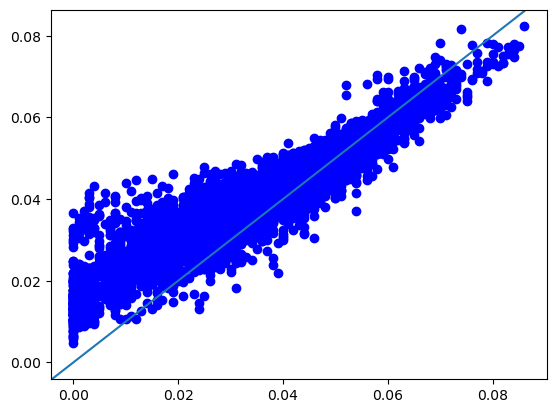

In [10]:
plt.plot(y_test, y_test_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()

In [11]:
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

MAE: 0.0062
MSE: 0.0001


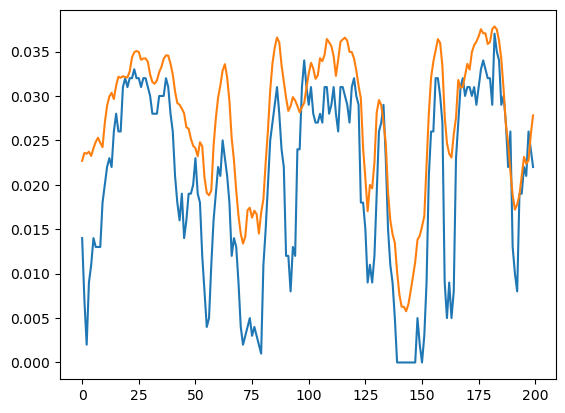

In [12]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

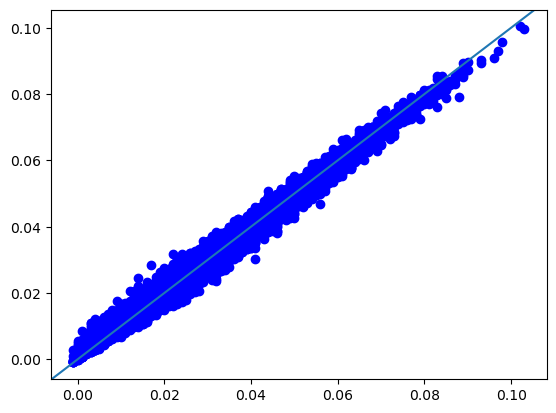

In [13]:
y_train_pred = aq_rf.predict(X_train)
plt.plot(y_train, y_train_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()